In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [29]:
all_data_dir = "./data/raw/train_all_tasks.csv"
all_data_df = pd.read_csv(all_data_dir)
all_data_df.head()

,rewire_id,text,label_sexist,label_category,label_vector
0,sexism2022_english-7358,"Damn, this writing was pretty chaotic",not sexist,none,none
1,sexism2022_english-2367,"Yeah, and apparently a bunch of misogynistic v...",not sexist,none,none
2,sexism2022_english-3073,How the FUCK is this woman still an MP!!!???,not sexist,none,none
3,sexism2022_english-14895,Understand. Know you're right. At same time I ...,not sexist,none,none
4,sexism2022_english-4118,Surprized they didn't stop and rape some women,not sexist,none,none


In [53]:
# convert text to lowercase
all_data_df['text'] = all_data_df['text'].apply(lambda x: " ".join(x.lower() for x in x.split()))
all_data_df['text'].head()

#remove stopwords
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stop = stopwords.words('english')

all_data_df['text'] = all_data_df['text'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))
all_data_df['text'].head()

#remove punctuation
all_data_df['text'] = all_data_df['text'].str.replace('[^\w\s]','')
all_data_df['text'].head()

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\vishw\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
C:\Users\vishw\AppData\Local\Temp\ipykernel_19788\1379206372.py:15: FutureWarning: The default value of regex will change from True to False in a future version.
  all_data_df['text'] = all_data_df['text'].str.replace('[^\w\s]','')


0                          damn writing pretty chaotic
1    yeah apparently bunch misogynistic virgins one...
2                                  fuck woman still mp
3    understand know right time know enough money w...
4                            surprized stop rape women
Name: text, dtype: object

In [54]:
all_data_df['text_len'] = all_data_df['text'].apply(lambda x: len(x.split()))
all_data_df.head()

,rewire_id,text,label_sexist,label_category,label_vector,text_len
0,sexism2022_english-7358,damn writing pretty chaotic,not sexist,none,none,4
1,sexism2022_english-2367,yeah apparently bunch misogynistic virgins one...,not sexist,none,none,11
2,sexism2022_english-3073,fuck woman still mp,not sexist,none,none,4
3,sexism2022_english-14895,understand know right time know enough money w...,not sexist,none,none,12
4,sexism2022_english-4118,surprized stop rape women,not sexist,none,none,4


<AxesSubplot: >

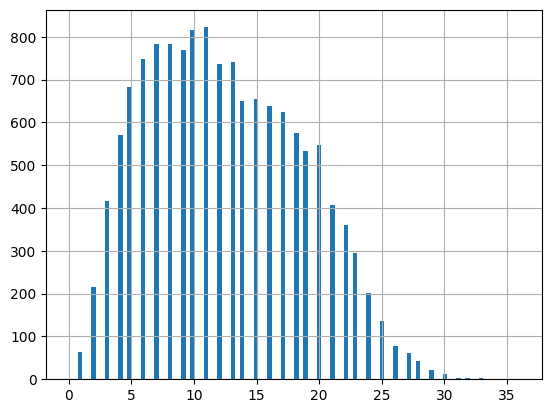

In [55]:
# text length distribution
all_data_df['text_len'].hist(bins=100)

<AxesSubplot: >

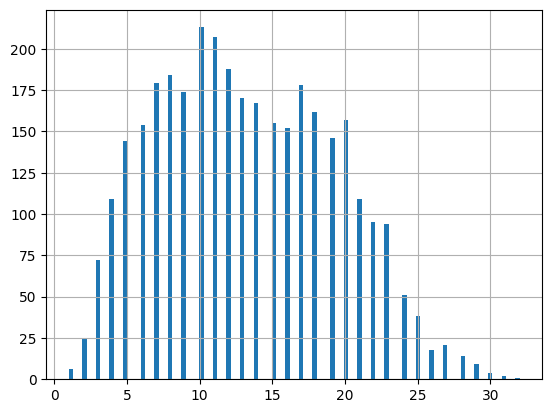

In [56]:
# text length distribution for sexist label
all_data_df[all_data_df['label_sexist'] == 'sexist']['text_len'].hist(bins=100)

<AxesSubplot: >

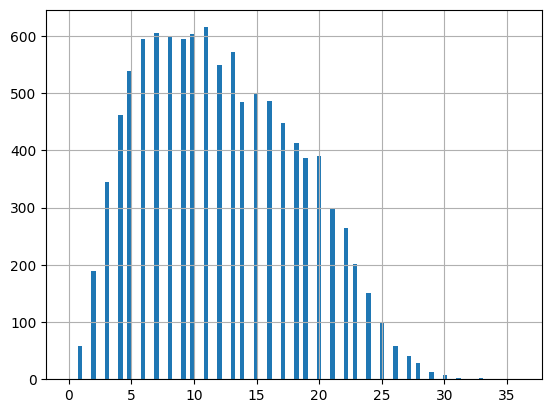

In [57]:
# text length distribution for non sexist label
all_data_df[all_data_df['label_sexist'] == 'not sexist']['text_len'].hist(bins=100)

<AxesSubplot: title={'center': 'Common words in text'}>

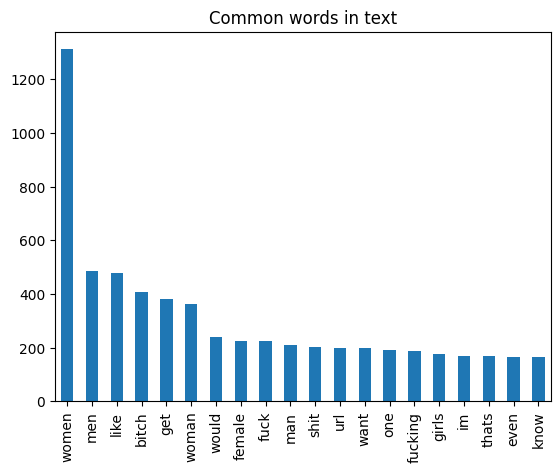

In [61]:
#plot common words in text for sexist label
freq = pd.Series(' '.join(all_data_df
                            [all_data_df['label_sexist'] == 'sexist']['text']).split()).value_counts()[:20]
freq.plot(kind='bar', title='Common words in text')

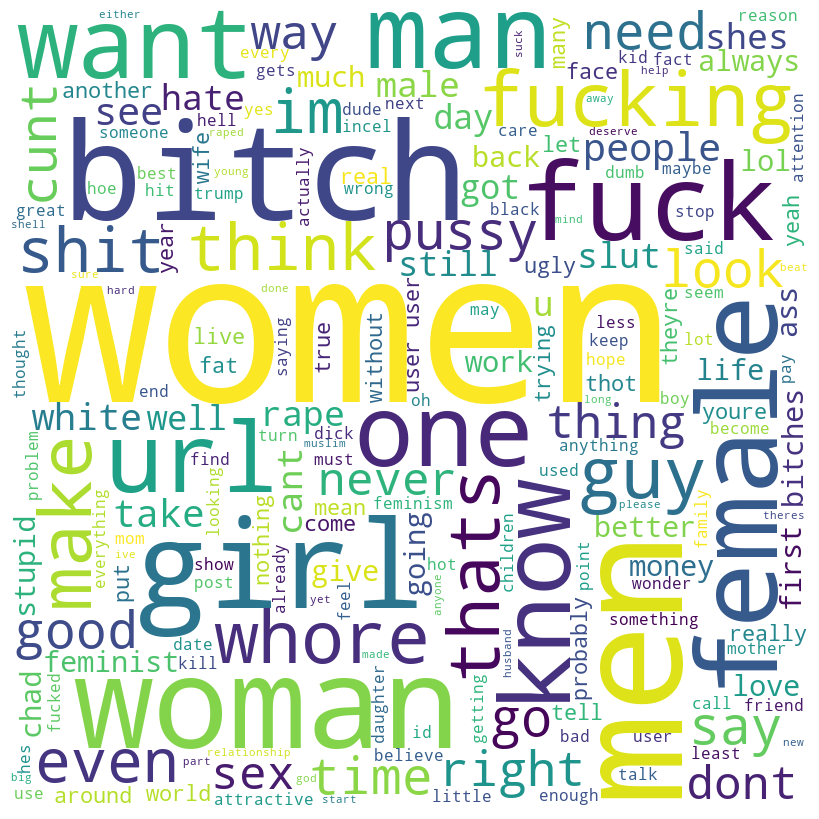

In [62]:
#word cloud for common words in text for sexist label
from wordcloud import WordCloud
import matplotlib.pyplot as plt
wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white', 
                min_font_size = 10).generate(' '.join(all_data_df
                            [all_data_df['label_sexist'] == 'sexist']['text']))
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
plt.show()



<AxesSubplot: title={'center': 'Common words in text'}>

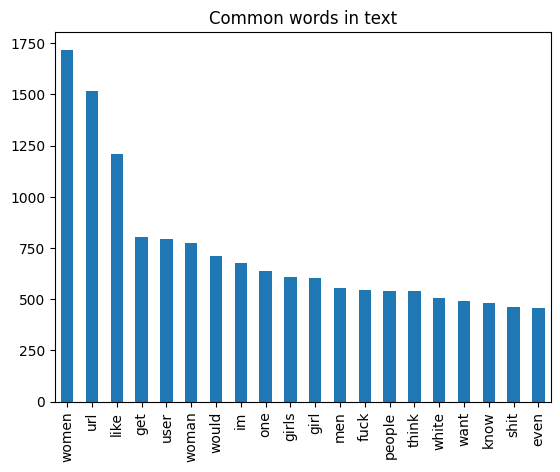

In [64]:
#plot common words in text for non sexist label
freq = pd.Series(' '.join(all_data_df
                            [all_data_df['label_sexist'] == 'not sexist']['text']).split()).value_counts()[:20] 
freq.plot(kind='bar', title='Common words in text')


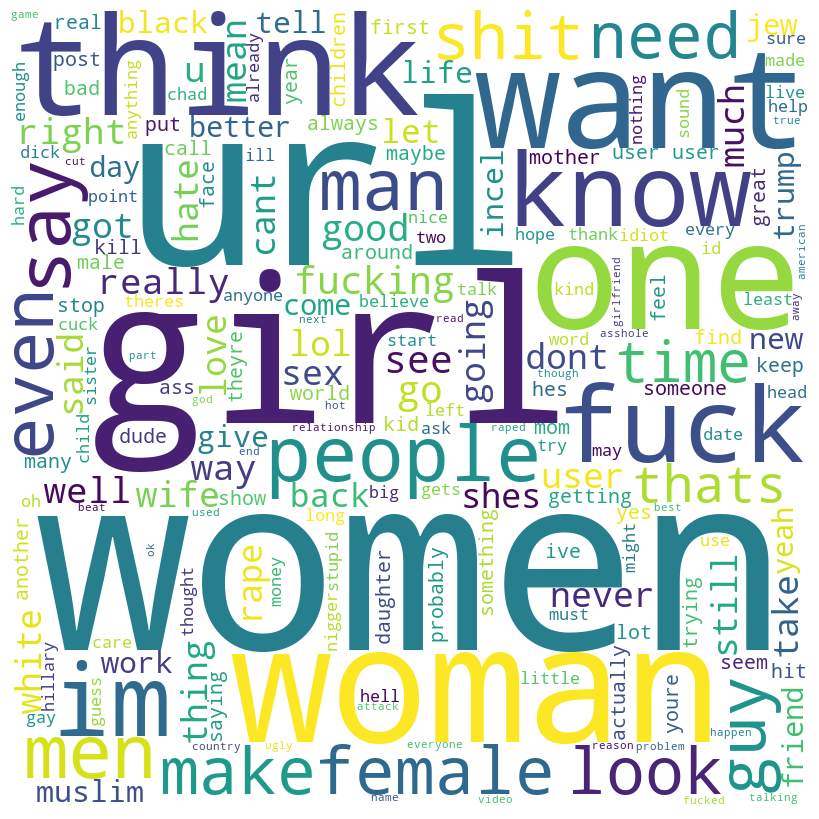

In [65]:
#word cloud for common words in text for non sexist label

wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                min_font_size = 10).generate(' '.join(all_data_df
                            [all_data_df['label_sexist'] == 'not sexist']['text']))
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
plt.show()




In [68]:
# get out of vocab words using bert tokenizer
from transformers import BertTokenizer
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
all_data_df['text'] = all_data_df['text'].apply(lambda x: tokenizer.tokenize(x))
all_data_df['text'] = all_data_df['text'].apply(lambda x: [item for item in x if item not in tokenizer.vocab])
all_data_df['text'].head()



c:\Users\vishw\Anaconda3\envs\edos\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Downloading: 100%|██████████| 232k/232k [00:00<00:00, 800kB/s] 
c:\Users\vishw\Anaconda3\envs\edos\lib\site-packages\huggingface_hub\file_download.py:123: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\vishw\.cache\huggingface\hub. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either need to activate Developer Mode or to run Python as an administr

0    []
1    []
2    []
3    []
4    []
Name: text, dtype: object